## This script is to convert recorded demonstrations (from rosbag format) to samples (in txt format) to conform with the TP-GMM code.

In [15]:
import rosbag
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sys import platform
# from franka_msgs.msg import FrankaState

print(platform)
if platform == "linux":
    main_dir = "/home/zizo/Disassembly Teleop/"
    TPGMM_dir = "/home/zizo/myGithubRepos/TP-GMM/data/"
elif platform == "win32":
    main_dir = "C:/Users/AWasf/OneDrive/Desktop/PhD Lab Work/Disassembly-Teleop/"
    TPGMM_dir = "C:/Users/AWasf/OneDrive/Desktop/PhD Lab Work/TP-GMM/data/"


linux


### 3D

In [11]:
for d in range(1,4):
    task_name = "Rcover"
    task_num = str(d)

    demon_bag = rosbag.Bag(main_dir + "Demons/" + task_name + "/action/Franka_Stage2_" + task_name + "_action_Demon" + task_num + ".bag", 'r')

    data_topic = "/panda_teleop/follower_state_controller/franka_states"

    conc_arr_Data = np.zeros((4,1))
    msg_count = 0
    for topic, msg, t in demon_bag.read_messages(data_topic):

        # Preparing the Data points matrix from the Demons
        # arr_Data = np.array([[sqrt(msg.O_T_EE_c[12]**2 + msg.O_T_EE_c[13]**2 + msg.O_T_EE_c[14]**2)], [msg.O_T_EE[12]], [msg.O_T_EE[13]], [msg.O_T_EE[14]]]) # Euc. distance of error_pose
        arr_Data = np.array([[msg.O_T_EE_c[0]], [msg.O_T_EE[12]], [msg.O_T_EE[13]], [msg.O_T_EE[14]]]) # time sample

        conc_arr_Data = np.concatenate((conc_arr_Data, arr_Data), axis=1)

        # Preparing the b matrix & A matrix for frame 1 (Position & RotationMatrix of the Starting point(frame) of the Demon w.r.t the base frame of the robot (panda_link0))
        if (msg_count == 0):
            arr_frame1_b = np.array([[0], [msg.O_T_EE[12]], [msg.O_T_EE[13]], [msg.O_T_EE[14]]])
            arr_frame1_A = np.matrix([[1,             0,             0,             0],
                                    [0, msg.O_T_EE[0], msg.O_T_EE[4], msg.O_T_EE[8]],
                                    [0, msg.O_T_EE[1], msg.O_T_EE[5], msg.O_T_EE[9]],
                                    [0, msg.O_T_EE[2], msg.O_T_EE[6], msg.O_T_EE[10]]])

        # Preparing the b matrix & A matrix for frame 2 (Position & RotationMatrix of the Ending point(frame) of the Demon w.r.t the base frame of the robot (panda_link0))
        arr_frame2_b = np.array([[0], [msg.O_T_EE[12]], [msg.O_T_EE[13]], [msg.O_T_EE[14]]])
        arr_frame2_A = np.matrix([[1,             0,             0,             0],
                                [0, msg.O_T_EE[0], msg.O_T_EE[4], msg.O_T_EE[8]],
                                [0, msg.O_T_EE[1], msg.O_T_EE[5], msg.O_T_EE[9]],
                                [0, msg.O_T_EE[2], msg.O_T_EE[6], msg.O_T_EE[10]]])
                
        msg_count += 1
    demon_bag.close()
    print("Number of data points in Demo {}: {}".format(task_num, msg_count))

    # Filling in b matrix & A matrix for frame 1
    conc_arr_frame1_b = np.ones((4, msg_count)) * arr_frame1_b
    conc_arr_frame1_A = np.tile(arr_frame1_A, msg_count) # the .T is because the rotation is around negative y-axis

    # Filling in b matrix & A matrix for frame 2
    conc_arr_frame2_b = np.ones((4, msg_count)) * arr_frame2_b
    conc_arr_frame2_A = np.tile(arr_frame2_A, msg_count)

    # Saving in txt files
    np.savetxt(TPGMM_dir + "Demon" + task_num + "_sample_Data.txt", conc_arr_Data[:,1:], fmt='%.5f') # cut out the 1st column (zeros) that was created only to initialize the array 
    np.savetxt(TPGMM_dir + "Demon" + task_num + "_sample_frame1_b.txt", conc_arr_frame1_b, fmt='%.5f')
    np.savetxt(TPGMM_dir + "Demon" + task_num + "_sample_frame1_A.txt", conc_arr_frame1_A, fmt='%.5f')
    np.savetxt(TPGMM_dir + "Demon" + task_num + "_sample_frame2_b.txt", conc_arr_frame2_b, fmt='%.5f')
    np.savetxt(TPGMM_dir + "Demon" + task_num + "_sample_frame2_A.txt", conc_arr_frame2_A, fmt='%.5f')

    # Add the ',' to put file in the format that TP-GMM code accepts
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_Data.txt", 'r') as f: # The 'r' before the directory name is to open the file as read-only
        data = f.read(); data = data.replace(' ', ',')
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_Data.txt", 'w') as f:
        f.write(data)
        
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame1_b.txt", 'r') as f:
        data = f.read(); data = data.replace(' ', ',')
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame1_b.txt", 'w') as f:
        f.write(data)

    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame1_A.txt", 'r') as f:
        data = f.read(); data = data.replace(' ', ',')
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame1_A.txt", 'w') as f:
        f.write(data)

    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame2_b.txt", 'r') as f:
        data = f.read(); data = data.replace(' ', ',')
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame2_b.txt", 'w') as f:
        f.write(data)

    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame2_A.txt", 'r') as f:
        data = f.read(); data = data.replace(' ', ',')
    with open(r"{}".format(TPGMM_dir) + "Demon" + task_num + "_sample_frame2_A.txt", 'w') as f:
        f.write(data)

Number of data points in Demo 1: 1455
Number of data points in Demo 2: 1640
Number of data points in Demo 3: 851


### DTW the demons

Reference Demon:
(4, 851)
DTWinng..
(4, 1455)
(850,)
Debugging
(4, 850)


DTWinng..
(4, 1640)
(850,)
Debugging
(4, 850)


DTWinng..
(4, 851)
(850,)
Debugging
(4, 850)




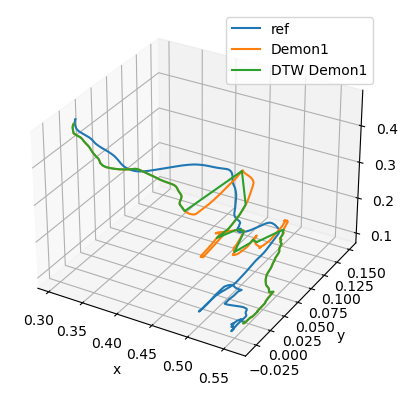

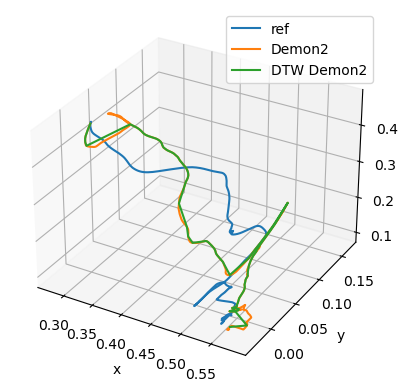

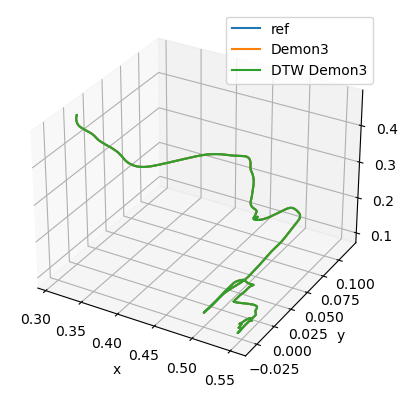

In [13]:
%matplotlib inline
# %matplotlib qt
from dtw import *

print("Reference Demon:")
ref_demon = str(3)
ref_arr_Data = np.loadtxt(TPGMM_dir + "Demon" + ref_demon + "_sample_Data.txt", delimiter=',')
print(ref_arr_Data.shape)

for d in range(1,4):
    demon_num = str(d)
    
    print("DTWinng..")
    temp_arr_Data = np.loadtxt(TPGMM_dir + "Demon" + demon_num + "_sample_Data.txt", delimiter=',')
    print(temp_arr_Data.shape)

    DTW = dtw(temp_arr_Data[1:,:].T, ref_arr_Data[1:,:].T)
    wq = warp(DTW, index_reference=False)
    print(wq.shape)

    ## Plotting
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot(ref_arr_Data[1,:], ref_arr_Data[2,:], ref_arr_Data[3,:], label='ref')
    ax.plot(temp_arr_Data[1,:], temp_arr_Data[2,:], temp_arr_Data[3,:], label='Demon{}'.format(d))
    ax.plot(temp_arr_Data[1,wq], temp_arr_Data[2,wq], temp_arr_Data[3,wq], label='DTW Demon{}'.format(d))
    
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ## Saving in .txt
    temp_arr_Data = temp_arr_Data[:,wq]
    temp_arr_Data[0,:] = ref_arr_Data[0,:ref_arr_Data.shape[1]-1]
    np.savetxt(TPGMM_dir + "Demon" + demon_num + "_sample_Data.txt", temp_arr_Data, fmt='%.5f')
    with open(r"{}".format(TPGMM_dir) + "Demon" + demon_num + "_sample_Data.txt", 'r') as f: # The 'r' before the directory name is to open the file as read-only
        data = f.read(); data = data.replace(' ', ',')
    with open(r"{}".format(TPGMM_dir) + "Demon" + demon_num + "_sample_Data.txt", 'w') as f:
        f.write(data)

    ## Only for debuggin to check the txt file shape
    print("Debugging")
    temp_arr_Data = np.loadtxt(TPGMM_dir + "Demon" + demon_num + "_sample_Data.txt", delimiter=',')
    print(temp_arr_Data.shape)
    print("\n")
    
